In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
titanic_df = pd.read_csv("train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
missing_values = titanic_df.isnull().sum()
print("Missing Values:")
print(missing_values)

titanic_df.fillna({'Age': titanic_df['Age'].median()}, inplace=True)

if 'Cabin' in titanic_df.columns:
    titanic_df.drop('Cabin', axis=1, inplace=True)
    print("Column 'Cabin' has been dropped.")
else:
    print("Column 'Cabin' does not exist in the DataFrame.")

print("\nAfter handling missing values:")
print(titanic_df.isnull().sum())

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Column 'Cabin' has been dropped.

After handling missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [4]:
print("\nSummary Statistics:")
print(titanic_df.describe())


Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


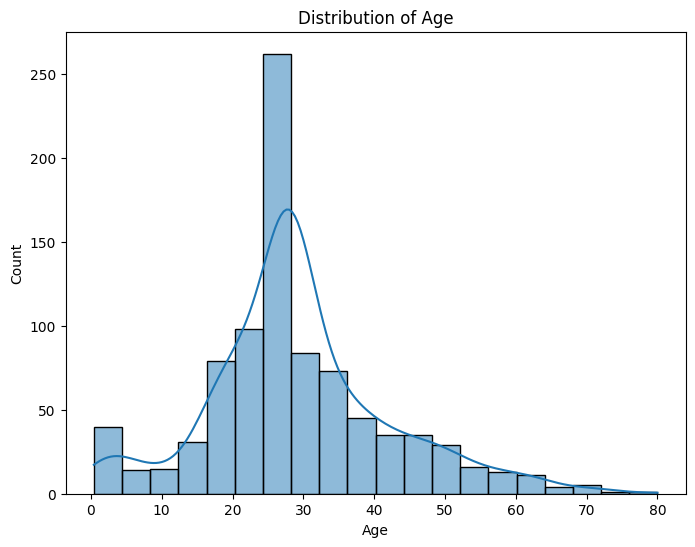

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(titanic_df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

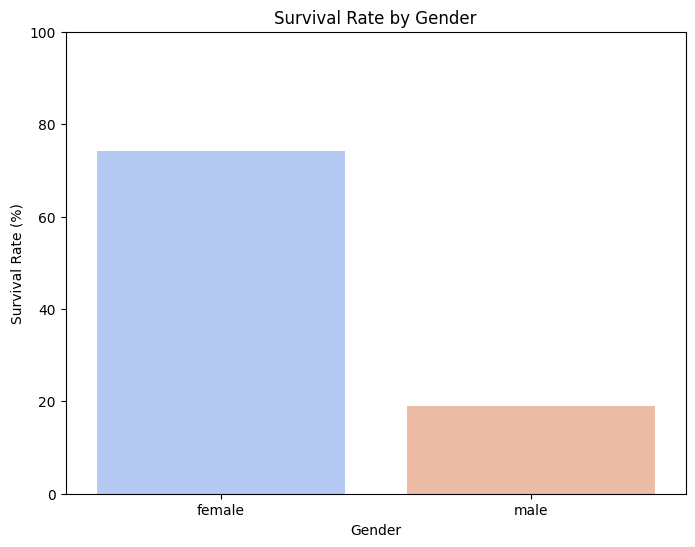

In [6]:
gender_count = titanic_df['Sex'].value_counts()
survived_gender_count = titanic_df.groupby('Sex')['Survived'].sum()

survival_rate = (survived_gender_count / gender_count) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate.index, y=survival_rate.values, hue=survival_rate.index, palette='coolwarm', dodge=False)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate (%)')
plt.ylim(0, 100)
plt.show()

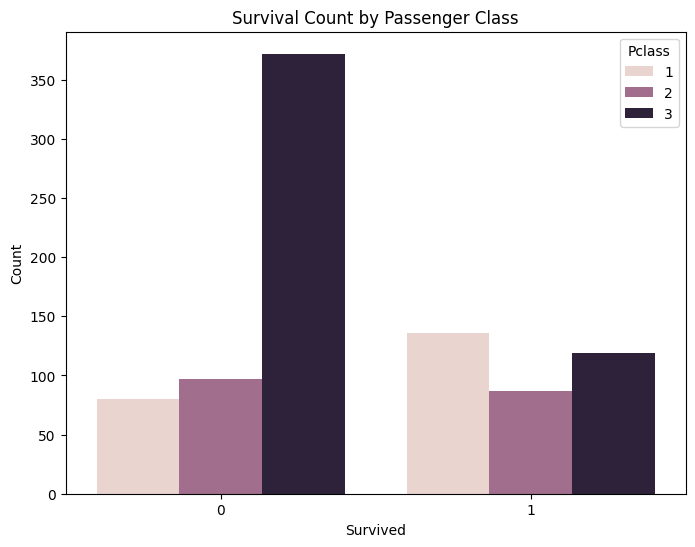

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.show()     

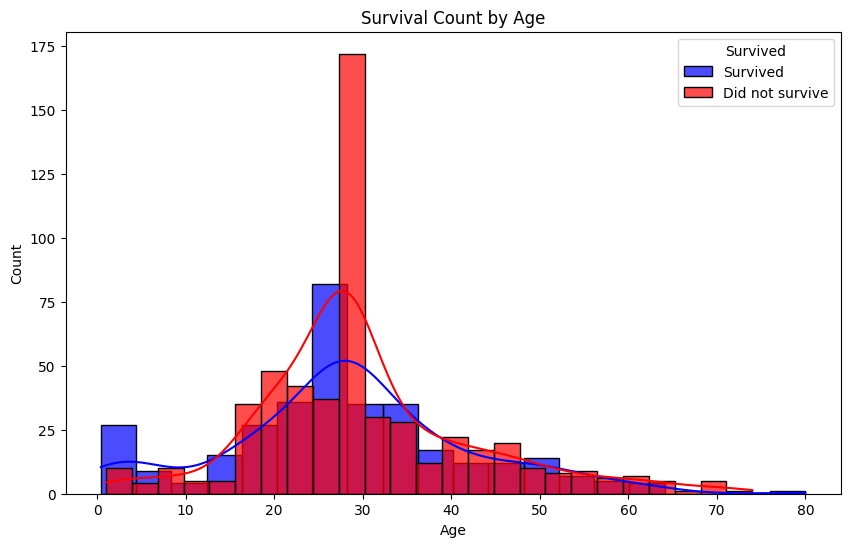

In [8]:
survived = titanic_df[titanic_df['Survived'] == 1]
not_survived = titanic_df[titanic_df['Survived'] == 0]

plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=survived, kde=True, color='blue', label='Survived', alpha=0.7)
sns.histplot(x='Age', data=not_survived, kde=True, color='red', label='Did not survive', alpha=0.7)
plt.title('Survival Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

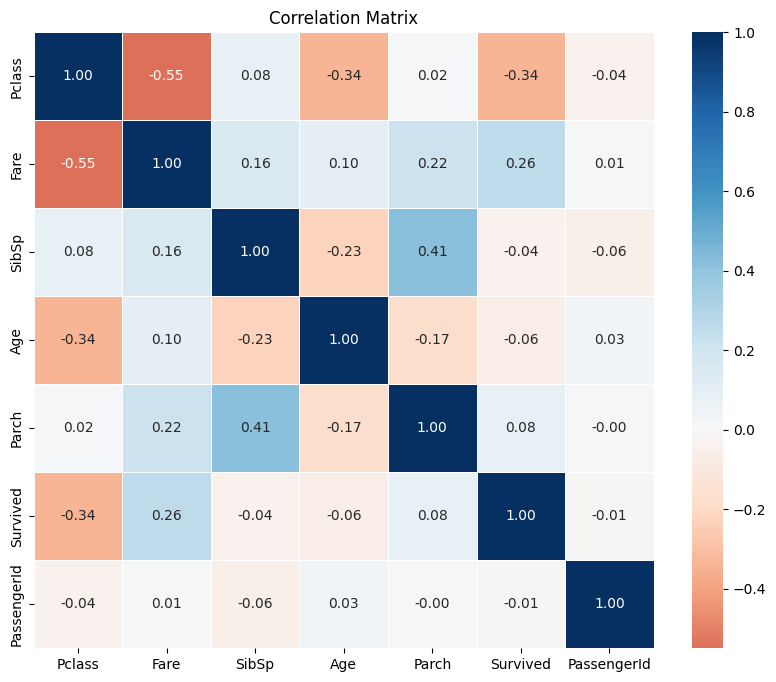

In [9]:
numeric_columns = titanic_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

corr_order = correlation_matrix.abs().sum().sort_values(ascending=False).index
correlation_matrix = correlation_matrix.reindex(index=corr_order, columns=corr_order)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5, center=0)
plt.title('Correlation Matrix')
plt.show()